# Day 4
## Retrieving data from Yahoo!Finance
[Yahoo!Finance](Yahoo!Finance) offers historical market data, recent, several years' financial
statements, current quotes, analyst recommendations, options data, and more. The
historical trading data include daily, weekly, monthly, and dividends. The historical
data has several variables: open price, high price achieved, lowest price achieved,
trading volume, close price, and adjusted-close price (which is adjusted for splits and
dividends). Historical quotes typically do not go back further than 1960. offers historical market data, recent, several years' financial statements, current quotes, analyst recommendations, options data, and more. The historical trading data include daily, weekly, monthly, and dividends. The historical data has several variables: open price, high price achieved, lowest price achieved, trading volume, close price, and adjusted-close price (which is adjusted for splits and dividends). Historical quotes typically do not go back further than 1960.

In [1]:
import pandas as pd
x=pd.read_csv("AAPL.csv")
print(type(x))

<class 'pandas.core.frame.DataFrame'>


To view the first and the last few observations, the `.head()` and `.tail()` functions could be used. The default values of those two functions are 5. In the following, the command of `x.head()` will output the first five lines, while `x.tail(2)` will output the last two lines:

In [2]:
x.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400.0


In [3]:
x.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
9877,2020-02-14,324.739990,325.980011,322.850006,324.950012,324.950012,20028400.0
9878,2020-02-18,315.359985,319.750000,314.609985,319.000000,319.000000,38132800.0


## Accessing specific elements

In [4]:
print(x['Open'])

0         0.513393
1         0.488839
2         0.453125
3         0.462054
4         0.475446
           ...    
9874    323.600006
9875    321.470001
9876    324.190002
9877    324.739990
9878    315.359985
Name: Open, Length: 9879, dtype: float64


In [5]:
print(x['Close'])

0         0.513393
1         0.486607
2         0.450893
3         0.462054
4         0.475446
           ...    
9874    319.609985
9875    327.200012
9876    324.869995
9877    324.950012
9878    319.000000
Name: Close, Length: 9879, dtype: float64


In [6]:
print(x['Open']-x['Close'])

0       0.000000
1       0.002232
2       0.002232
3       0.000000
4       0.000000
          ...   
9874    3.990021
9875   -5.730011
9876   -0.679993
9877   -0.210022
9878   -3.640015
Length: 9879, dtype: float64


In [9]:
import matplotlib.pyplot as plt

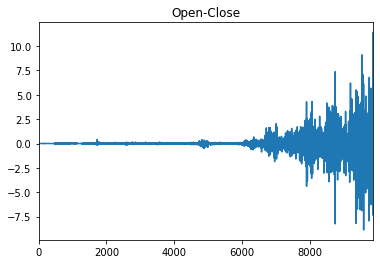

In [12]:
(x['Open']-x['Close']).plot(title='Open-Close')
#plt.show()

Another way of thinking about stock volatility is to consider High-Low. What are the benefits of this measure compared to standard deviation?

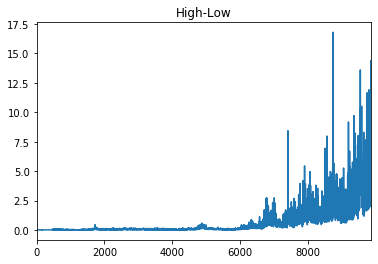

In [13]:
(x['High']-x['Low']).plot(title='High-Low')

The measure above did not account for a trend in price over the years. So, an adjustment needs to be made:

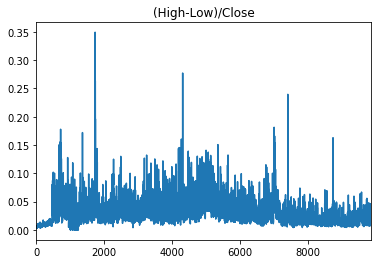

In [14]:
((x['High']-x['Low'])/x['Close']).plot(title='(High-Low)/Close')

## Series

`Series` is a one-dimensional **labeled** array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The labels are collectively referred to as the index. Financial data, such as stock price or volume traded, does not contain numeric data only, but also the time stamp which can be used as labels in `Series`.

The basic method to create a `Series` is to call:

`>>> s = pd.Series(data, index=index)`

In [15]:
ts = pd.Series(list(x['Open']-x['Close']),x['Date'])

In [16]:
print(ts)

Date
1980-12-12    0.000000
1980-12-15    0.002232
1980-12-16    0.002232
1980-12-17    0.000000
1980-12-18    0.000000
                ...   
2020-02-11    3.990021
2020-02-12   -5.730011
2020-02-13   -0.679993
2020-02-14   -0.210022
2020-02-18   -3.640015
Length: 9879, dtype: float64


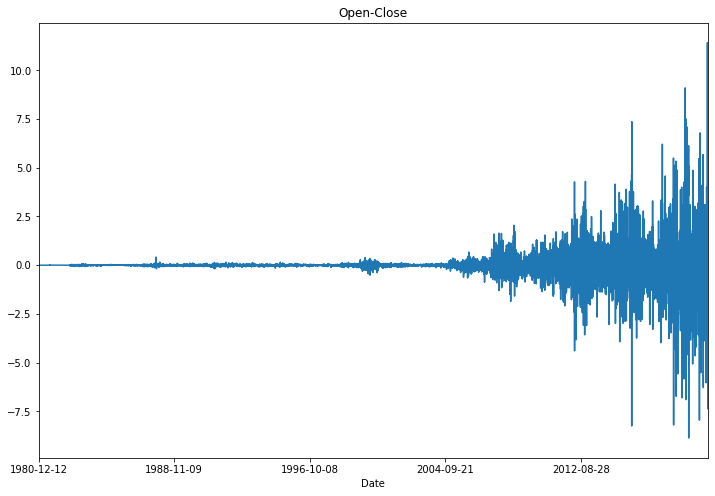

In [17]:
ts.plot(title='Open-Close',figsize=(12,8))

In [18]:
print(type(x['Adj Close']))

<class 'pandas.core.series.Series'>


In [19]:
P = x['Adj Close'].to_list()
print(type(P))

<class 'list'>


Suppose you want to calculate returns ($r_t$) given a series of prices ($P_t$.)

Your returns are   $r_{t}=\frac{P_{t}-P_{t-1}}{P_{t-1}}$.

In [20]:
r = (P[1:]-P[0:-1])/P[0:-1]
print(r)

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [21]:
# Need to use list comprehensions, and destructuring
r = [(x1 - x2)/x2 for (x1, x2) in zip(P[1:], P[0:-1])]

print(r[0:25])  # This prints the first 25 values in the list 'r'

[-0.05217536665830843, -0.07339492372094482, 0.024752281251749556, 0.02898637815041125, 0.06103287631233163, 0.04867315308463435, 0.042193710307709145, 0.05263157894736845, 0.09230819415448867, 0.014083581697316301, -0.024304962492220434, -0.028469901263831164, 0.01098932962189754, -0.021739753922046655, -0.044443653329871144, -0.042636143089131565, -0.020242738893161773, 0.05371899860982935, -0.007842624230316415, -0.03557412953113137, 0.004099253375105935, 0.02040797487255123, -0.007999475295937516, 0.0604832918012753, -0.03041840626383967]


Alternatively, can extract specific elements using `iloc[]` method.

Recall our dataframe `x`:

In [94]:
x.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400.0


In [95]:
x.iloc[0,0]

'1980-12-12'

In [96]:
x.iloc[0,1]

0.513393

In [97]:
x.iloc[1:,5]

1         0.385558
2         0.357260
3         0.366103
4         0.376715
5         0.399707
           ...    
9874    319.609985
9875    327.200012
9876    324.869995
9877    324.950012
9878    319.000000
Name: Adj Close, Length: 9878, dtype: float64

In [98]:
x.iloc[0:-1,5]

0         0.406782
1         0.385558
2         0.357260
3         0.366103
4         0.376715
           ...    
9873    321.549988
9874    319.609985
9875    327.200012
9876    324.869995
9877    324.950012
Name: Adj Close, Length: 9878, dtype: float64

Operations with arrays of data are vector and matrix operations and are done through `numpy` (you can also visualise this in **Excel** by opening `AAPL.csv` and shiting blocks of data):

In [22]:
import numpy as np
r2 = (np.array(x.iloc[1:,5])-np.array(x.iloc[0:-1,5]))/np.array(x.iloc[0:-1,5])
print(r2)

[-0.05217537 -0.07339492  0.02475228 ... -0.00712108  0.0002463
 -0.01831055]


Date
1980-12-15   -0.052175
1980-12-16   -0.073395
1980-12-17    0.024752
1980-12-18    0.028986
1980-12-19    0.061033
                ...   
2020-02-11   -0.006033
2020-02-12    0.023748
2020-02-13   -0.007121
2020-02-14    0.000246
2020-02-18   -0.018311
Length: 9878, dtype: float64


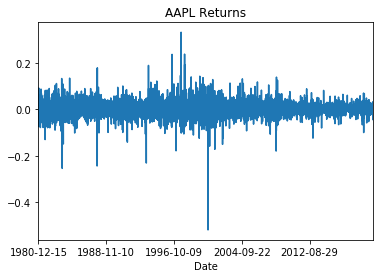

In [23]:
APPLret = pd.Series(r2,x.iloc[1:,0])  # why Series labels are starting from 1? ==> x.iloc[1:,0]
print(APPLret)
APPLret.plot(title='AAPL Returns')

### <font color=red> Homework </font>
> Plot percentage change in traded volume instead of returns

## Getting data directly from the Web
Another way of getting data is directly from the oline source. Use `panda_datareader` library. For the latest developments and the list of sources see [here](https://pandas-datareader.readthedocs.io/en/latest/).

Note that is you want a **quiet** installation (no output during installation process) , use option `pip -q install package_name` instead of `pip -q install package_name`:

In [1]:
pip -q install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Software\\Anaconda3\\Lib\\site-packages\\pandas_datareader'
Consider using the `--user` option or check the permissions.



Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Software\Anaconda3\python.exe -m pip <command> [options]

no such option: --user129895


In [2]:
from pandas_datareader import data

aapl = data.DataReader("AAPL", 
                       start='1980-12-11', 
                       end='2021-02-01', 
                       data_source='yahoo')

ModuleNotFoundError: No module named 'pandas_datareader'

In [103]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101073
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095800
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088768
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090965
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093603


In [104]:
aapl.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-29,136.740005,130.210007,135.830002,131.960007,177180600.0,131.960007
2021-02-01,135.380005,130.929993,133.750000,134.139999,106239800.0,134.139999


In [105]:
# Only get the adjusted close for a specific period.
aapl_oneyear = data.DataReader("AAPL", 
                       start='2014-1-1', 
                       end='2014-12-31', 
                       data_source='yahoo')['Adj Close']
print(type(aapl_oneyear))

<class 'pandas.core.series.Series'>


In [106]:
aapl_oneyear.head()

Date
2013-12-31    17.875999
2014-01-02    17.624594
2014-01-03    17.237455
2014-01-06    17.331453
2014-01-07    17.207500
Name: Adj Close, dtype: float64

In [107]:
aapl_oneyear.tail()

Date
2014-12-24    25.508888
2014-12-26    25.959806
2014-12-29    25.941589
2014-12-30    25.625034
2014-12-31    25.137676
Name: Adj Close, dtype: float64

In [108]:
print(aapl_oneyear[0:])

Date
2013-12-31    17.875999
2014-01-02    17.624594
2014-01-03    17.237455
2014-01-06    17.331453
2014-01-07    17.207500
                ...    
2014-12-24    25.508888
2014-12-26    25.959806
2014-12-29    25.941589
2014-12-30    25.625034
2014-12-31    25.137676
Name: Adj Close, Length: 253, dtype: float64


In [109]:
# Convert the adjusted closing prices to cumulative returns.
ret = aapl_oneyear.pct_change() # fill_method='ffill' if there are missing values
print(ret)
print(type(ret))

Date
2013-12-31         NaN
2014-01-02   -0.014064
2014-01-03   -0.021966
2014-01-06    0.005453
2014-01-07   -0.007152
                ...   
2014-12-24   -0.004709
2014-12-26    0.017677
2014-12-29   -0.000702
2014-12-30   -0.012203
2014-12-31   -0.019019
Name: Adj Close, Length: 253, dtype: float64
<class 'pandas.core.series.Series'>


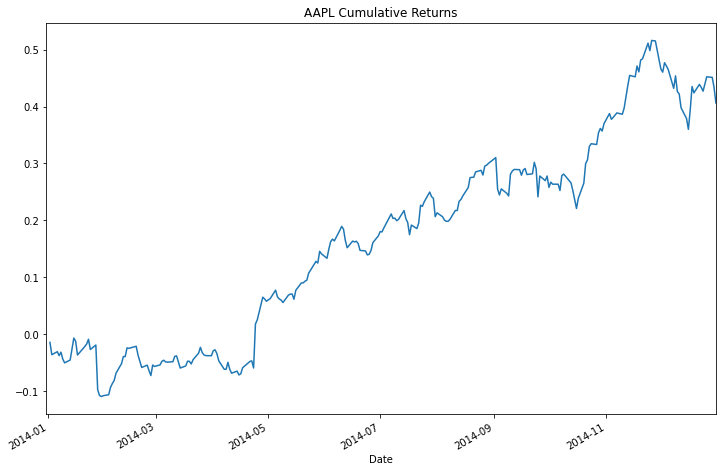

In [110]:
((1 + ret).cumprod() - 1).plot(title='AAPL Cumulative Returns',figsize=(12,8))

Apply to all columns:

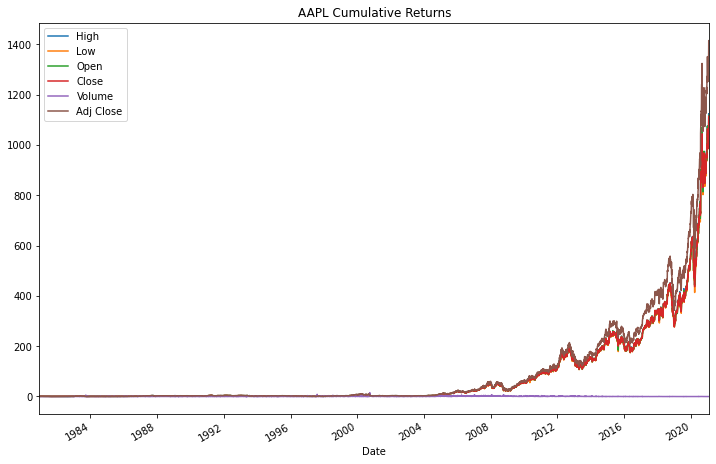

In [111]:
ret = aapl.pct_change()
((1 + ret).cumprod() - 1).plot(title='AAPL Cumulative Returns',figsize=(12,8))


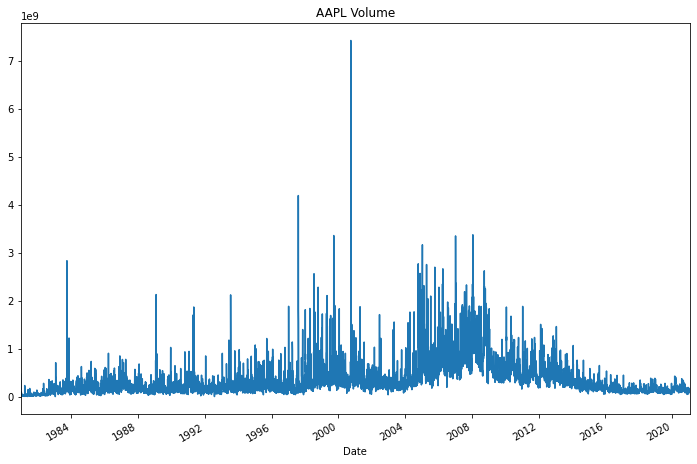

In [112]:
vol = aapl.iloc[:,4].plot(title='AAPL Volume',figsize=(12,8))

In [11]:
# Create a dictionary containing several stocks
ticker_list={'INTC':'Intel', 
            'MSFT':'Microsoft',
            'BHP':'BHP',
            'BA':'Boeing',
            'TA':'Toyota',
            'GME':'GameStop',
            'PTR':'PetroChina'}
print(ticker_list)

{'INTC': 'Intel', 'MSFT': 'Microsoft', 'BHP': 'BHP', 'BA': 'Boeing', 'TA': 'Toyota', 'GME': 'GameStop', 'PTR': 'PetroChina'}


In [12]:
import datetime as dt

def read_data(ticker_list,
              start=dt.datetime(2020,1,2),
              end=dt.datetime(2021,2,3)):
    ticker=pd.DataFrame()
    
    for tick in ticker_list:
        prices=data.DataReader(tick,'yahoo',start, end)
        closing_prices=prices['Close']
        ticker[tick]=closing_prices
        
    return ticker

In [15]:
x=read_data(ticker_list)

In [16]:
x.tail()

,INTC,MSFT,BHP,BA,TA,GME,PTR
Date,,,,,,,
2021-01-28,56.070000,238.929993,69.309998,197.229996,27.809999,193.600006,31.230000
2021-01-29,55.509998,231.960007,66.779999,194.190002,27.490000,325.000000,30.420000
2021-02-01,56.689999,239.649994,68.339996,195.839996,26.860001,225.000000,30.490000
2021-02-02,58.000000,239.509995,67.110001,200.940002,29.549999,90.000000,30.610001
2021-02-03,57.680000,243.000000,67.050003,207.389999,31.820000,92.410004,31.080000


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matpl

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

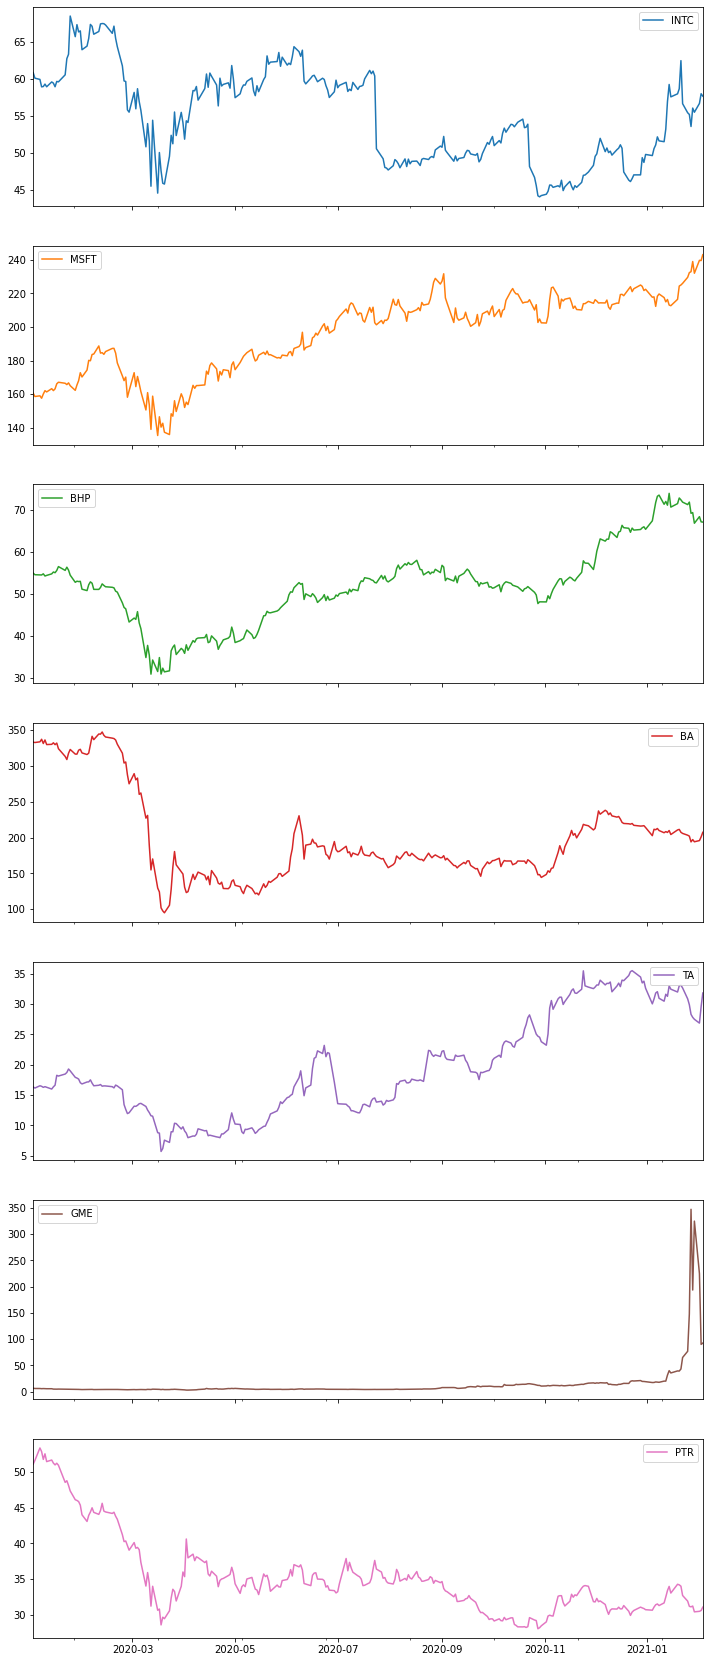

In [17]:
x.plot(title=x,subplots=True,figsize=(12,30))